### `Disease Prediction Classification with Machine Learning Algorithm`

#### import necessary libraries especially `Scikit-Learn` package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

/var/folders/l2/rc9k_3zs61s4vcmxpfwhs58h0000gn/T/ipykernel_24676/3191470448.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### <center> Data Collection and Analyzing


<ul><b>1- <mark>Filling or imputing (removing) missing data</ul>
<ul><b>2- <mark>Split Data into two sections X and Y which are for Features Variables and Target label(s)</ul>
<ul><b>3- <mark>Transform data from String or non-numerical to numerical for the machine to perform better</ul>
<ul><b>4- <mark> Split data into train and test sets to be ready for the model</ul>

#### Here is the time of reading training dataset

In [2]:
data_train = pd.read_csv('/Users/rezakharamani/Documents/GitHub/DiseasePredictionClassification/dataset/Training.csv')

In [3]:
## Notice : in this CSV file the last column is completely empty and it should not be considered in the training section
data_train = data_train.iloc[:, :-1]
data_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


#### Working on Target Column in order to be analyzed 

In [4]:
TargetLabel = data_train["prognosis"].value_counts()
DataFrame = pd.DataFrame({
    "Desiase": TargetLabel.index,
    "Count" : TargetLabel.values
})
print(f"The Number of recognized diseases is {len(DataFrame)} that the Number of each of them is {DataFrame.iloc[1,1]}")

The Number of recognized diseases is 41 that the Number of each of them is 120


In [5]:
DataFrame

,Desiase,Count
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


#### We want to plot the Disease oin the barchar or graph chart 

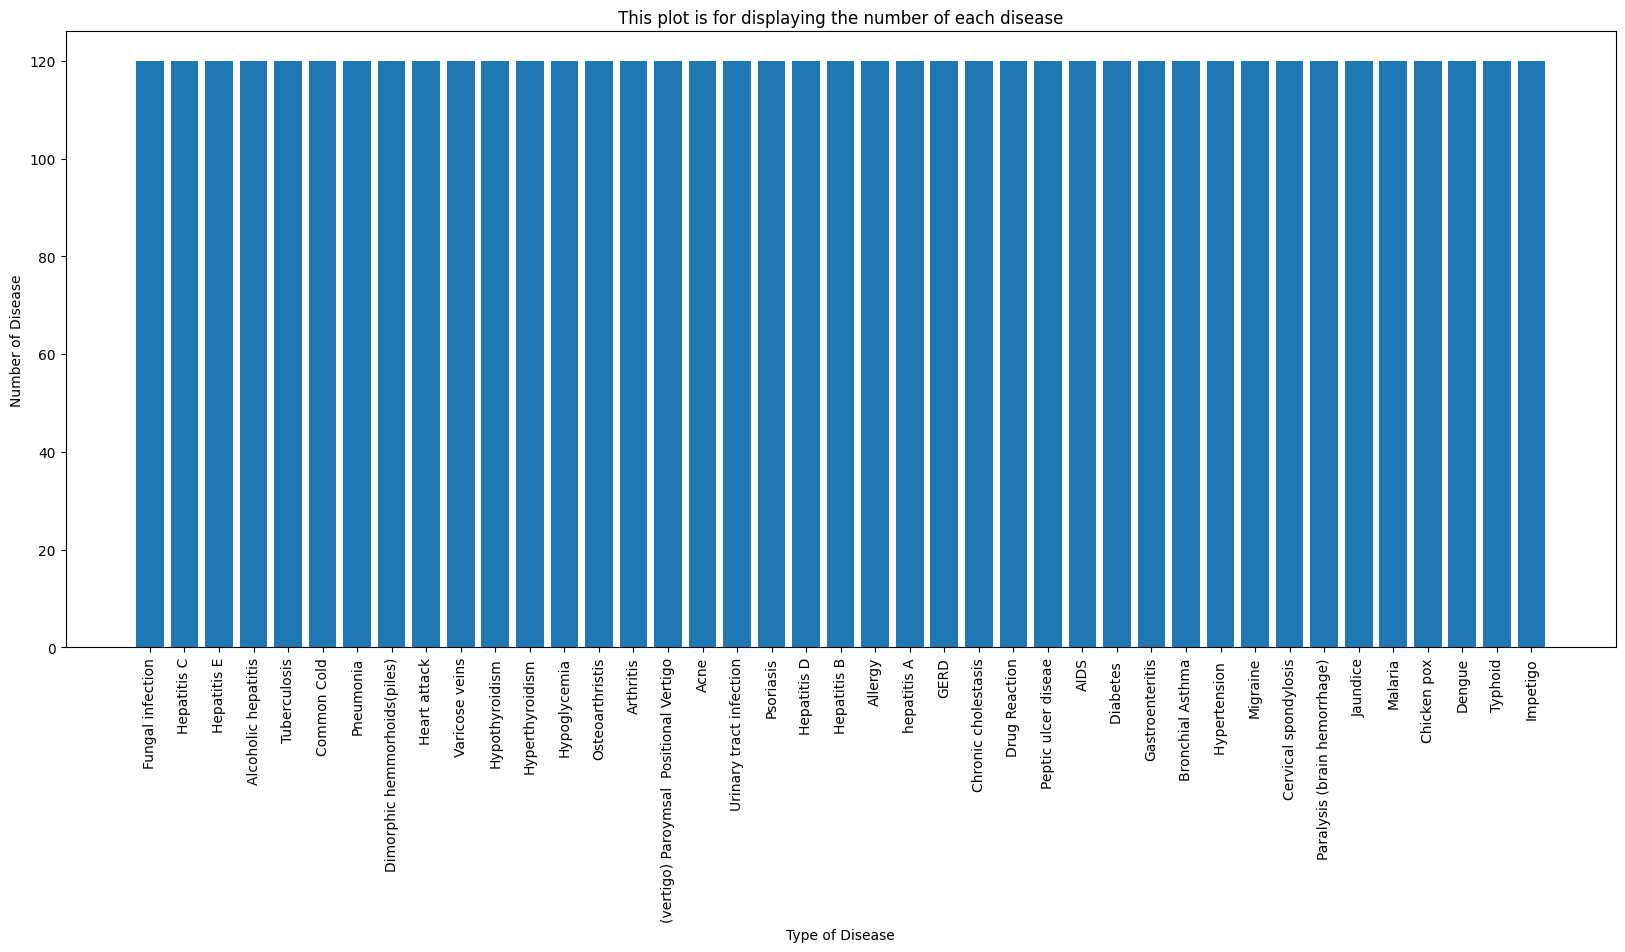

In [6]:
plt.figure(figsize=(20,8))
plt.bar(x=DataFrame.iloc[:,0], height=DataFrame.iloc[:,1])
plt.title("This plot is for displaying the number of each disease")
plt.xticks(rotation='vertical')
plt.xlabel("Type of Disease")
plt.ylabel("Number of Disease")
plt.show()


## <center> Data Cleaning and Imputing (Imputation)

##### In this section we have to find the NaN values 
    --> if the target value has NaN values, we should remove the row of that index
    --> if the feature values have NaN avlues, we should fill the fileds with data Manually or by Imputation

In [7]:
data_train.dropna(subset=["prognosis"], inplace=True)

In [8]:
# for target value 
Feature_Section = data_train.drop("prognosis", axis = 1)
Target_Section = data_train["prognosis"]

In [9]:
# count NaN values
Feature_Section.isna().sum() # for each column
sum(Feature_Section.isna().sum())

0

In [10]:
Target_Section.isna().sum()

0

- There is no NaN values in both sections Features and Target columns
- but we do Manually and Python library Imputing to solve other problems and soltions in the next problems

### Manual Imputation 

In [11]:
CountData = Feature_Section["itching"].value_counts()
print(CountData)

print(f"to get the maximum number between 0 and 1 we use idmax which is --> {CountData.idxmax()}")

itching
0    4242
1     678
Name: count, dtype: int64
to get the maximum number between 0 and 1 we use idmax which is --> 0


In [12]:
Feature_Section["itching"].fillna(0)
Feature_Section["itching"].fillna(1)
Feature_Section["itching"].fillna(data_train["itching"].value_counts().idxmax(), inplace=True)

# this code is manually filling the NaN values for column "itching" with 0 or 1 or Max Number index
# if there are various other numbers, for example we can get the mean of the numebers to fill the NaN space

/var/folders/l2/rc9k_3zs61s4vcmxpfwhs58h0000gn/T/ipykernel_24676/2336684434.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Feature_Section["itching"].fillna(data_train["itching"].value_counts().idxmax(), inplace=True)



***strategy***, default=’mean’ The imputation strategy.

    If mean, then replace missing values using the mean along each column. Can only be used with numeric data.
    If median, then replace missing values using the median along each column. Can only be used with numeric data.
    If most_frequent, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
    If constant, then replace missing values with fill_value. Can be used with strings or numeric data.

fill_value str or numerical value, default=None

When strategy == “constant”, fill_value is used to replace all occurrences of missing_values. For string or object data types, fill_value must be a string. If None, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data type

### Apply Imputing on Feature values not Target Values

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# we should fillna values for features not target values, 
# and instead if there are nan values in target value, remove the related row for that 

# list of the Columns 
MostFrequent = ["itching","skin_rash"]
StringMissing = ["nodal_skin_eruptions"]
MeanValue = ["chills"]

MostFrequentImputer = SimpleImputer(strategy="most_frequent")
StringMissingImputer = SimpleImputer(strategy="constant", fill_value=0)
MeanValueImputer = SimpleImputer(strategy="mean")

transformer = ColumnTransformer(
    [
        ("MostFrequent Imputer", MostFrequentImputer, MostFrequent),
        ("String Imputer", StringMissingImputer, StringMissing),
        ("Mean Imputer", MeanValueImputer, MeanValue)
    ], 
    remainder="passthrough"
)

FeaturesTransformed = transformer.fit_transform(Feature_Section)
FeaturesTransformed


# remainder = "passthrough" is used to attach all of the remained and not Imputed to the dataframe 
# remainder = "drop" is used to the drop the unimputed columns or values in the feature section


array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [14]:
Feature_Section = pd.DataFrame(FeaturesTransformed, columns= Feature_Section.columns.tolist())
Feature_Section

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4918,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


### Encoding Section 


`LabelEncoder:` ** if there is no category in the column to be converted **
    
Purpose: LabelEncoder is used to convert categorical labels (textual categories) into numerical labels.

Functionality: It assigns a unique integer to each category, essentially converting them into numerical form.

`OneHotEncoder:` ** if there is categorical string or Numerical values in the columns**

Purpose: OneHotEncoder is used to <u>convert categorical integer features</u> (which may result from using LabelEncoder) into a one-hot encoded format.

Functionality: It creates binary columns for each category and represents the presence or absence of a category with 1 or 0.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


encoder = LabelEncoder()
TargetValueConverted = encoder.fit_transform(Target_Section)
TargetValueConverted

array([15, 15, 15, ..., 38, 35, 27])

In [16]:
Target_Section = pd.DataFrame(TargetValueConverted, columns=["prognosis"])

In [17]:
Target_Section

,prognosis
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


# Split data into train and test sections for training the model

In [18]:
x_train, x_test, y_train, y_test = train_test_split(Feature_Section, Target_Section, test_size=0.2)

In [19]:
x_train.shape, x_test.shape

((3936, 132), (984, 132))

In [20]:
y_train.shape, y_test.shape

((3936, 1), (984, 1))

# Import Classification Algorithms to train the model

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [22]:
y_pred = model.predict(x_test)

In [23]:

# Ecaluate  

from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test, y_pred)
print(f"The accuracy acquired from Random Forest Classifier is {(accuracy * 100):.0f}%")

The accuracy acquired from Random Forest Classifier is 100%


In [24]:
from sklearn.calibration import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


model_path = {
    
    "RandomForest": RandomForestClassifier(),
    "NaiveBayse": GaussianNB(),
    "SVC": SVC()
}

def getScore(estimator, X,y_test):
    y_pred = estimator.predict(X)
    return accuracy_score(y_test, y_pred)


for model in model_path:
    model = model_path[model]
    Cross_Scores = cross_val_score(model, Feature_Section ,Target_Section, cv=5, n_jobs=-1, scoring= getScore)

    Prediction = cross_val_predict(model, Feature_Section, Target_Section, cv=5)
    
    
    print(f"The Accuracy for 5 folds of the model {model} is {Cross_Scores}")
    print(f"The Accuracy for model {model} is {np.mean(Cross_Scores)}")
    print("\n")
    print("=="*30)
    print(f"The Prediction is {Prediction}")
    



/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array

The Accuracy for 5 folds of the model RandomForestClassifier() is [1. 1. 1. 1. 1.]
The Accuracy for model RandomForestClassifier() is 1.0


The Prediction is [15 15 15 ... 38 35 27]


/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d

The Accuracy for 5 folds of the model GaussianNB() is [1. 1. 1. 1. 1.]
The Accuracy for model GaussianNB() is 1.0


The Prediction is [15 15 15 ... 38 35 27]


/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d

The Accuracy for 5 folds of the model SVC() is [1. 1. 1. 1. 1.]
The Accuracy for model SVC() is 1.0


The Prediction is [15 15 15 ... 38 35 27]


/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### some info about cross-validation kFold : (if we use cross-validation kFolds, we should feed X and Y data into the function not splitted data like x_train, x_test ....)

### <center> cross_val_score

sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', error_score=nan)

`estimator:` it is the algorithm we use for training the data like RandomForestClassifier, SVC and so on...

`X:` it is the feature values data like Feature_Section

`y:` it is the Target values data like Target_section 

`cv:` it is the number of kFolds
        - if it is none the default number is 5
        - or costumized number like 3, 8, 10 ... 

`n_jobs:` n_jobs is an integer, specifying the maximum number of concurrently running workers. If 1 is given, no joblib parallelism is used at all, which is useful for debugging. If set to -1, all CPUs are used. For n_jobs below -1, **(n_cpus + 1 + n_jobs)** are used. For example with n_jobs=-2, all CPUs but one are used.
n_jobs is None by default, which means unset; it will generally be interpreted as n_jobs=1, unless the current joblib.Parallel backend context specifies otherwise.

<br>
<br>


### <center> cross_val_predict

sklearn.model_selection.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', method='predict')

`estimator:` it is the algorithm we use for training the data like RandomForestClassifier, SVC and so on...

`X:` it is the feature values data like Feature_Section

`y:` it is the Target values data like Target_section 

`cv:` it is the number of kFolds
        - if it is none the default number is 5
        - or costumized number like 3, 8, 10 ... 



`The important Point is that:` The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set. <u>Passing these predictions into an evaluation metric may not be a valid way to measure generalization performance.</u> Results can differ from cross_validate and cross_val_score unless all tests sets have equal size and the metric decomposes over samples.

***** This solution is not valid for feeding the predicted training set to the evaluation metric to get the accuracy because in computing the accuracy the size of the folds may not be equal, therefore the accracy is not valid. 






--------------------------------------------

### Evaluation Machine Learning Model


There are 3 ways to evaluate Scikit-Learn model/estimator: 
    1- Estimator's built-in `score()` method 
    2- The `scoring` parameter 
    3- Problem-specific metrics functions 

here is the link of the evaluation metrics : [link](https://scikit-learn.org/stable/modules/model_evaluation.html)


There are 3 different APIs for evaluating the quality of a model’s predictions:

   `1- Estimator score method:` 
    Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.
    
    ---> model.score(x_test, y_test)

    Description: This refers to the default evaluation criterion or scoring method provided by individual machine learning estimators. Each machine learning algorithm or model in scikit-learn has a default scoring method that it uses to evaluate its performance on the given problem.
    Usage: When you train a model using an estimator, it often has a score method that provides a default evaluation metric for the specific task the model is designed to solve. This method is usually used for quick evaluation during model training.


   `2- Scoring parameter:` 
    Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.


    Description: When using cross-validation tools like model_selection.cross_val_score or model_selection.GridSearchCV, you can specify a scoring parameter to define the evaluation metric to be used during cross-validation.
    Usage: You can customize the evaluation metric used during cross-validation by providing the scoring parameter. This allows you to choose a metric that aligns with the specific goals of your modeling task.



   `3- Metric functions:` 
    The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.


    Description: The sklearn.metrics module contains a variety of functions that assess prediction error for specific purposes. These metrics are categorized into sections such as Classification metrics, Multilabel ranking metrics, Regression metrics, and Clustering metrics.
    Usage: After training a model, you can use these metric functions to evaluate the model's performance on specific aspects, such as accuracy, precision, recall, mean squared error, etc. These metrics provide more fine-grained insights into the model's behavior and are often used for in-depth analysis.


### Cross Validation

<img src ="/Users/rezakharamani/Data/env/GitHub/DiseasePrediction/CrossValidation.png" >




if the number of the fold (ex. 10) 10 time all data will be divided to test and train set to get the higher accurracy. 
this action is for covering all of the data to train better the model. 

### Classification model evaluation metrics 



1- Accyracy 

2- Area under ROC curve 

3- Confusion Matrix 

4- Classification Report



`1- Accuracy:` it can be computed by model.score() / cross_validation accuracy / metrics like accuracy_score and so on 

`2- Area under ROC curve`: 
    there are two types of charaterestics for curve (AUC / ROC):

        1- Area under curve (AUC)
    
        2- ROC curve


*** ROC curves are a comparison of a model's true positive (trp) versus model's false positive rate (fpr).

`True Positive`: Model Predicts 1 when True is 1

`False Positive` Model Predicts 1 when True is 0

`True Negative`: Model Predicts 0 when True is 0

`False Negative` Model Predicts 0 when True is 1


/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of SVC model on training data is 1.0 and on test data is 1.0



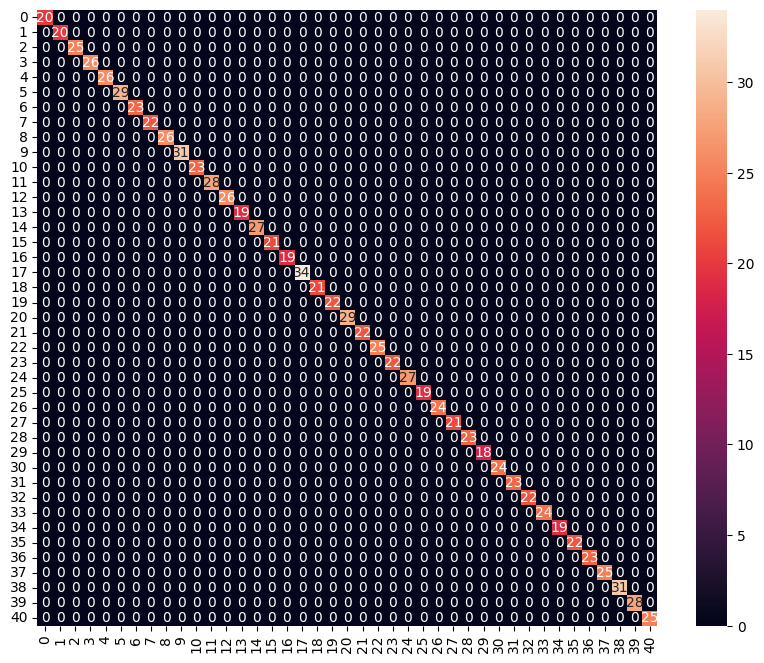

/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of Bayze model on training data is 1.0 and on test data is 1.0



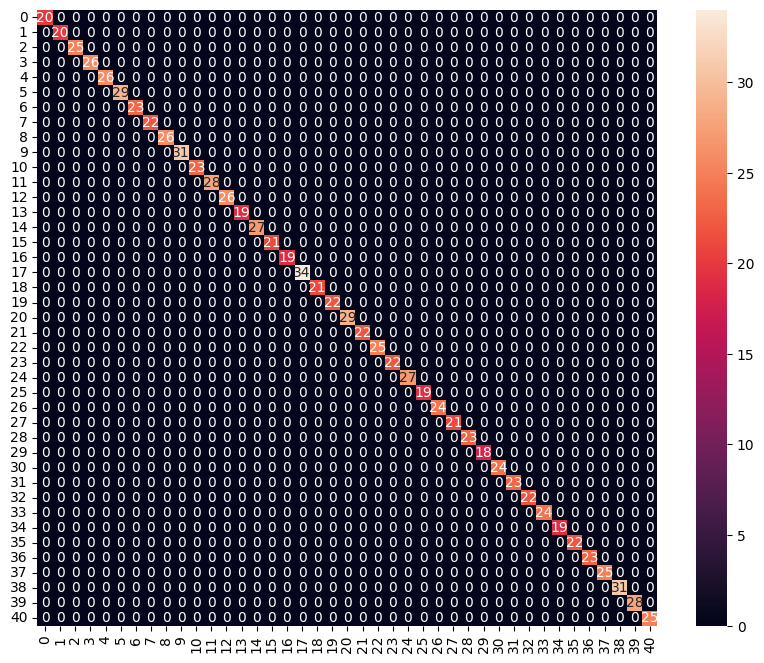

/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The accuracy of RandomForestClassifier model on training data is 1.0 and on test data is 1.0



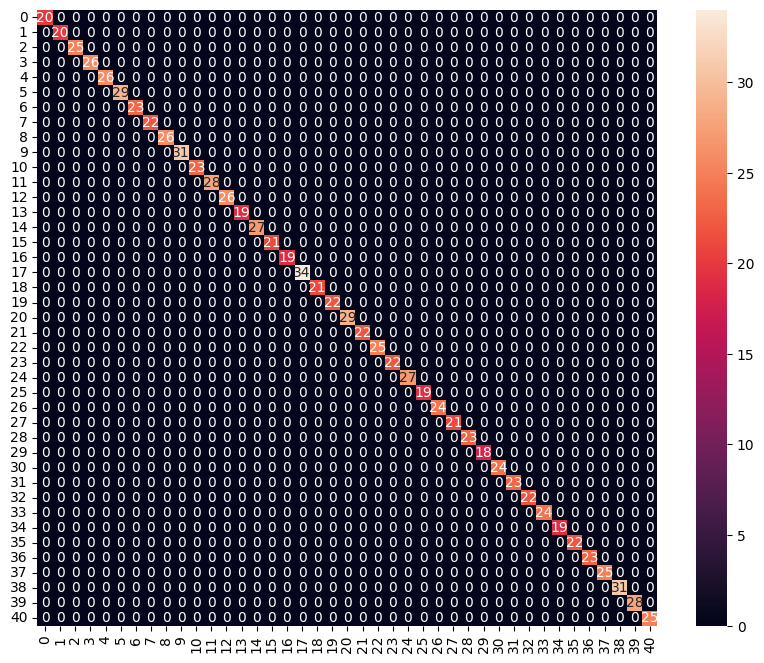

In [25]:
# Through cross_validation we have found the data to be trained on unseen data 
# so we seperately get the the accuracy score and confustion matrics on train and test data
# here below seperately I have computed accuaracy and plot it on confusion matrix

from sklearn import metrics
from sklearn.svm import SVC
import seaborn as sn


svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_train  = svm_model.predict(x_train) 
y_pred_test = svm_model.predict(x_test)

train_accuracy  = accuracy_score(y_train, y_pred_train)
test_accuracy  = accuracy_score(y_test, y_pred_test)

print(f"The accuracy of SVC model on training data is {train_accuracy} and on test data is {test_accuracy}\n")


plt.figure(figsize=(10,8))
confMatrix = confusion_matrix(y_test,y_pred_test)
sn.heatmap(confMatrix, annot=True)
plt.show()



BayzModel = GaussianNB()
BayzModel.fit(x_train, y_train)
y_pred_train  = BayzModel.predict(x_train) 
y_pred_test = BayzModel.predict(x_test)

train_accuracy  = accuracy_score(y_train, y_pred_train)
test_accuracy  = accuracy_score(y_test, y_pred_test)

print(f"The accuracy of Bayze model on training data is {train_accuracy} and on test data is {test_accuracy}\n")


plt.figure(figsize=(10,8))
confMatrix = confusion_matrix(y_test,y_pred_test)
sn.heatmap(confMatrix, annot=True)
plt.show()



RandomModel = RandomForestClassifier()
RandomModel.fit(x_train, y_train)
y_pred_train  = RandomModel.predict(x_train) 
y_pred_test = RandomModel.predict(x_test)

train_accuracy  = accuracy_score(y_train, y_pred_train)
test_accuracy  = accuracy_score(y_test, y_pred_test)

print(f"The accuracy of RandomForestClassifier model on training data is {train_accuracy} and on test data is {test_accuracy}\n")


plt.figure(figsize=(10,8))
confMatrix = confusion_matrix(y_test,y_pred_test)
sn.heatmap(confMatrix, annot=True)
plt.show()







### Confustion Matrix 

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.


In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one; in unsupervised learning it is usually called a matching matrix.

Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature.The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

For more info click on the [link](https://en.wikipedia.org/wiki/Confusion_matrix)

### After Checking the accuracy and data during the training process we could undrestand that the model has been trained well on the data no it is the time of predict new value in the test dataset stored in the system

In [65]:
import pandas as pd
svm_model = SVC()
bayze_model = GaussianNB()
RandomForest_Model = RandomForestClassifier()

svm_model.fit(x_train, y_train)
bayze_model.fit(x_train, y_train)
RandomForest_Model.fit(x_train, y_train)

## now we call the new as test data to the dataframe 

New_Data = pd.read_csv("/Users/rezakharamani/Data/env/GitHub/DiseasePrediction/dataset/Testing.csv")
New_Data

/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [96]:
New_Data.dropna(subset=["prognosis"], inplace=True)

X_test = New_Data.drop("prognosis", axis = 1)
Y_test = New_Data["prognosis"]


In [108]:
from sklearn.preprocessing import LabelEncoder

encoding = LabelEncoder()
Y_test_Labeled = encoding.fit_transform(Y_test)


[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15]
[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15]
[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27  8]

The Final Accuracy is 1.0


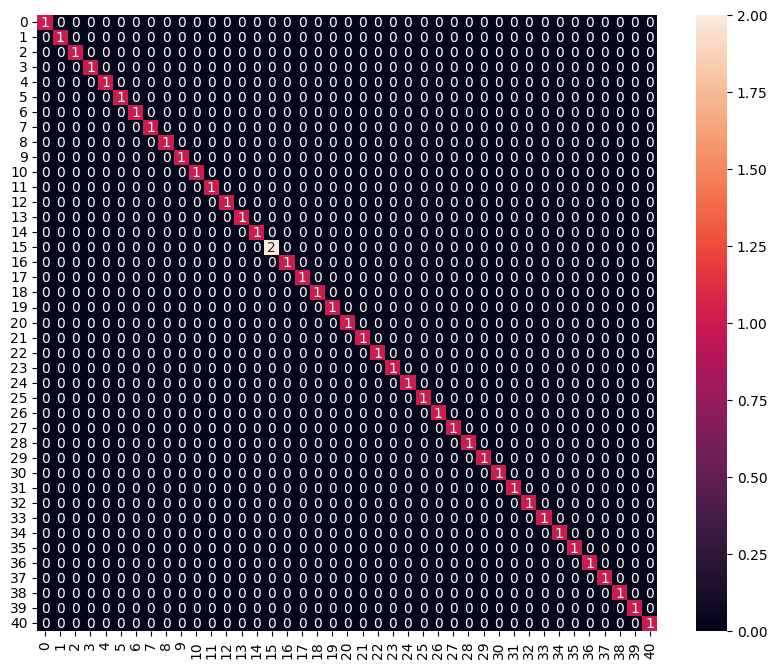

In [109]:
from statistics import mode


pred1 = svm_model.predict(X_test)
pred2 = bayze_model.predict(X_test)
pred3 = RandomModel.predict(X_test)


print(pred1)
print(pred2)
print(pred3)

FinalScore = [mode([i,j,k]) for i,j,k in zip(pred1, pred2, pred3)]

print(f"\nThe Final Accuracy is {accuracy_score(Y_test_Labeled, FinalScore)}")

plt.figure(figsize=(10,8))
toConfMatrics = confusion_matrix(Y_test_Labeled, FinalScore)
sn.heatmap(toConfMatrics, annot=True)
plt.show()


In [116]:


InputData = "Itching,Skin Rash,Nodal Skin Eruptions"



ListData = []
for str in InputData.split(","):
    ListData.append(str)
Final = []
for i in range(len(X_test.iloc[1])):
    if ListData:
        Final.append(1)
        ListData.pop()
    else:
        Final.append(0)

MyArray = np.array(Final).reshape(1,-1)
FianlPred1 = svm_model.predict(MyArray)
Label = encoding.inverse_transform(FianlPred1)
print(f"The Final Predicted Output is <<{Label[0]}>>")

The Final Predicted Output is <<Fungal infection>>


/Users/rezakharamani/Data/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
